In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt



In [2]:
train = pd.read_csv(r'D:\sm_project\train.csv', nrows=10_000_000)
test = pd.read_csv(r'D:\sm_project\test.csv')

In [3]:
train.shape

(10000000, 8)

In [4]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+07,1.000000e+07,1.000000e+07,9.999931e+06,9.999931e+06,1.000000e+07
mean,1.133854e+01,-7.250775e+01,3.991934e+01,-7.250897e+01,3.991913e+01,1.684793e+00
std,9.799930e+00,1.299421e+01,9.322539e+00,1.287532e+01,9.237280e+00,1.323423e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [6]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64

In [7]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
train = train.dropna(how = 'any',axis='rows')

In [9]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
train.shape



(9999931, 8)

In [11]:
train['fare_amount'].describe()


count    9.999931e+06
mean     1.133849e+01
std      9.799845e+00
min     -1.077500e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [12]:
train = train.drop(train[train['fare_amount']<0].index,axis=0)

In [13]:
train.shape

(9999511, 8)

In [14]:
train['fare_amount'].describe()


count    9.999511e+06
mean     1.133935e+01
std      9.798654e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [15]:
train['passenger_count'].describe()

count    9.999511e+06
mean     1.684798e+00
std      1.323415e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [16]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.30,2009-07-30 11:54:00 UTC,0.000000,0.000000,0.000000,0.000000,208
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
2154045,2010-12-16 11:21:00.000000209,3.30,2010-12-16 11:21:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2198549,2010-12-15 14:20:00.00000010,3.30,2010-12-15 14:20:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2910347,2010-12-16 06:44:00.00000039,4.50,2010-12-16 06:44:00 UTC,0.000000,0.000000,0.000000,0.000000,208
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4103745,2010-12-22 12:11:00.000000230,23.70,2010-12-22 12:11:00 UTC,0.000000,0.000000,0.000000,0.000000,208
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208


In [17]:
train = train.drop(train[train['passenger_count']>=6].index,axis=0)

In [18]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [19]:
train["pickup_latitude"].describe()

count    9.787639e+06
mean     3.992013e+01
std      9.331927e+00
min     -3.492264e+03
25%      4.073491e+01
50%      4.075263e+01
75%      4.076711e+01
max      3.344459e+03
Name: pickup_latitude, dtype: float64

In [20]:
train[train["pickup_latitude"]< -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
1281413,2011-09-02 22:51:00.000000213,11.3,2011-09-02 22:51:00 UTC,-2256.421232,-1185.391185,-2256.421232,-1185.391185,1
1340837,2011-06-09 10:39:00.000000137,10.1,2011-06-09 10:39:00 UTC,2434.238557,-3458.664702,-1281.933787,-104.637653,1
1388984,2012-01-18 21:33:00.00000068,11.3,2012-01-18 21:33:00 UTC,-1649.643088,-849.829532,2842.474030,3345.917353,1
1606685,2011-07-05 17:10:00.00000063,4.9,2011-07-05 17:10:00 UTC,-1329.480383,-764.564600,3382.125693,-1160.217295,1
1781778,2011-10-13 07:10:00.00000014,6.5,2011-10-13 07:10:00 UTC,-1659.514697,-821.904472,-1659.514697,-821.904472,1
2035826,2012-01-11 23:48:00.000000139,6.1,2012-01-11 23:48:00 UTC,-3313.387292,-812.119530,-567.531472,-2545.761383,1
2037003,2011-05-22 17:08:00.000000163,7.3,2011-05-22 17:08:00 UTC,-2995.982437,-2847.702303,-1265.146753,-16.566552,1


In [21]:
train[train["pickup_latitude"]> 90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
...,...,...,...,...,...,...,...,...
9374930,2012-02-07 21:31:00.00000049,4.9,2012-02-07 21:31:00 UTC,2135.003807,2973.980450,2135.003807,2973.980450,1
9796958,2011-05-31 21:34:00.000000139,7.7,2011-05-31 21:34:00 UTC,-73.978910,476.150000,-73.981885,40.762270,4
9943835,2011-08-02 00:40:00.00000094,27.3,2011-08-02 00:40:00 UTC,2816.000388,1670.960123,-2214.501975,823.647947,1
9952157,2011-11-02 18:29:00.000000234,4.9,2011-11-02 18:29:00 UTC,405.597888,2925.069102,-3426.600617,886.626825,1


In [22]:
train = train.drop(train[train["pickup_latitude"]> 90].index,axis=0)
train = train.drop(train[train["pickup_latitude"]< -90].index,axis=0)

In [23]:
train.shape

(9787471, 8)

In [24]:
train["pickup_longitude"].describe()

count    9.787471e+06
mean    -7.250516e+01
std      1.107446e+01
min     -3.050559e+03
25%     -7.399208e+01
50%     -7.398181e+01
75%     -7.396711e+01
max      2.814476e+03
Name: pickup_longitude, dtype: float64

In [25]:
# we have drop the longitube more than 100 and less than - 100
#   nyc longi is from approximately -74.05 to -73.75 

train = train.drop(train[train["pickup_longitude"]< -100].index,axis=0)
train = train.drop(train[train["pickup_longitude"]> 100].index,axis=0)

In [26]:
train.shape

(9787330, 8)

In [27]:
train["dropoff_latitude"].describe()

count    9.787330e+06
mean     3.992085e+01
std      6.646810e+00
min     -3.114339e+03
25%      4.073403e+01
50%      4.075316e+01
75%      4.076810e+01
max      3.210337e+03
Name: dropoff_latitude, dtype: float64

In [28]:

train = train.drop(train[train["dropoff_latitude"]<-90].index,axis=0)
train = train.drop(train[train["dropoff_latitude"]> 90].index,axis=0)


In [29]:
train[train["dropoff_latitude"]<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [30]:
train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [31]:
train.shape

(9787268, 8)

In [32]:
train = train.drop(train[train["dropoff_longitude"]> 100].index,axis=0)
train = train.drop(train[train["dropoff_longitude"]< -100].index,axis=0)



In [33]:
train[train["dropoff_longitude"]<-100]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [34]:
train.dtypes


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [35]:
train['key'] = pd.to_datetime(train['key'])
train["pickup_datetime"] = pd.to_datetime(train['pickup_datetime'])

In [36]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [37]:
test['key'] = pd.to_datetime(test['key'])
test["pickup_datetime"] = pd.to_datetime(test['pickup_datetime'])

In [38]:
def haversine_distance(lat1,long1,lat2,long2):
    data = [train,test]
    for i in data:
        R = 6371
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lamba = np.radians(i[long2]-i[long1])

        
        a = np.sin(delta_phi / 2.0 ) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lamba / 2.0) ** 2

        c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))

        d = (R * c)
        i['H_Distance'] = d
    return d




In [39]:
haversine_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [40]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [41]:
data = [train,test]


In [42]:
# for i in data:
#     i['Year'] = i["pickup_datetime"].dt.year
#     i['Month'] = i["pickup_datetime"].dt.month
#     i['Day'] = i["pickup_datetime"].dt.day
#     i['Day of Week'] = i["pickup_datetime"].dt.dayofweek
#     i['Hour'] = i["pickup_datetime"].dt.hour


# Iterate over each DataFrame in the 'data' list
for i in data:
    # Extract and store the year component of the 'pickup_datetime' column
    i['Year'] = i["pickup_datetime"].dt.year
    
    # Extract and store the month component of the 'pickup_datetime' column
    i['Month'] = i["pickup_datetime"].dt.month
    
    # Extract and store the day component of the 'pickup_datetime' column
    i['Day'] = i["pickup_datetime"].dt.day
    
    # Extract and store the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) of the 'pickup_datetime' column
    i['Day of Week'] = i["pickup_datetime"].dt.dayofweek
    
    # Extract and store the hour component of the 'pickup_datetime' column
    i['Hour'] = i["pickup_datetime"].dt.hour


Text(0, 0.5, 'Frequency')

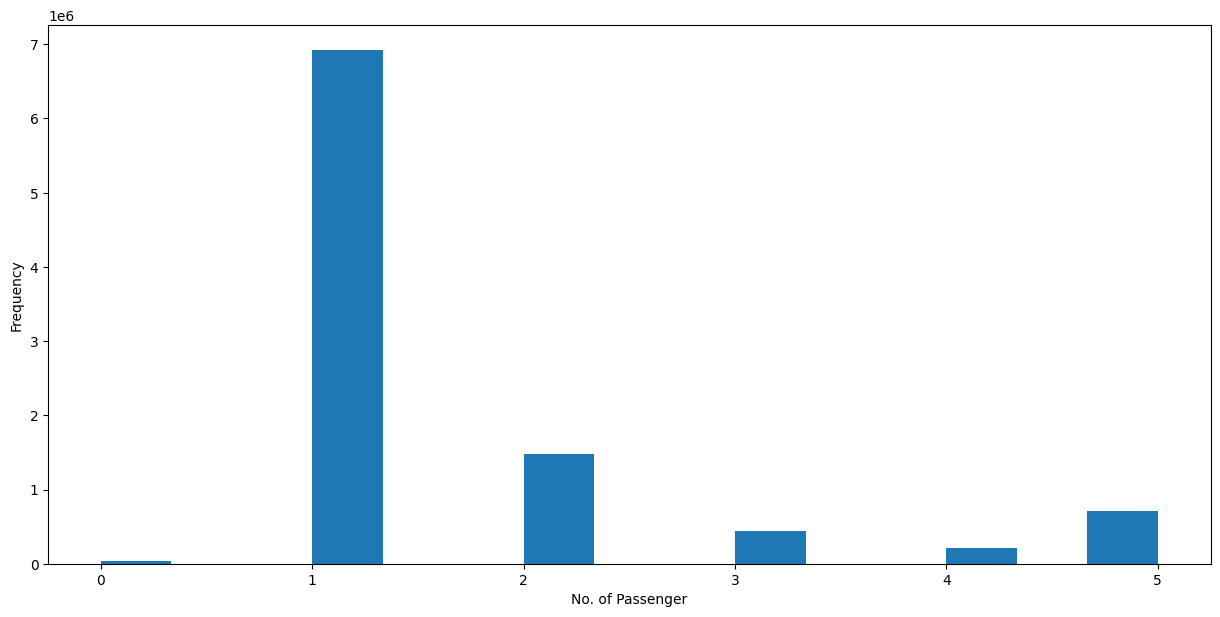

In [43]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'],bins=15)
plt.xlabel('No. of Passenger')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

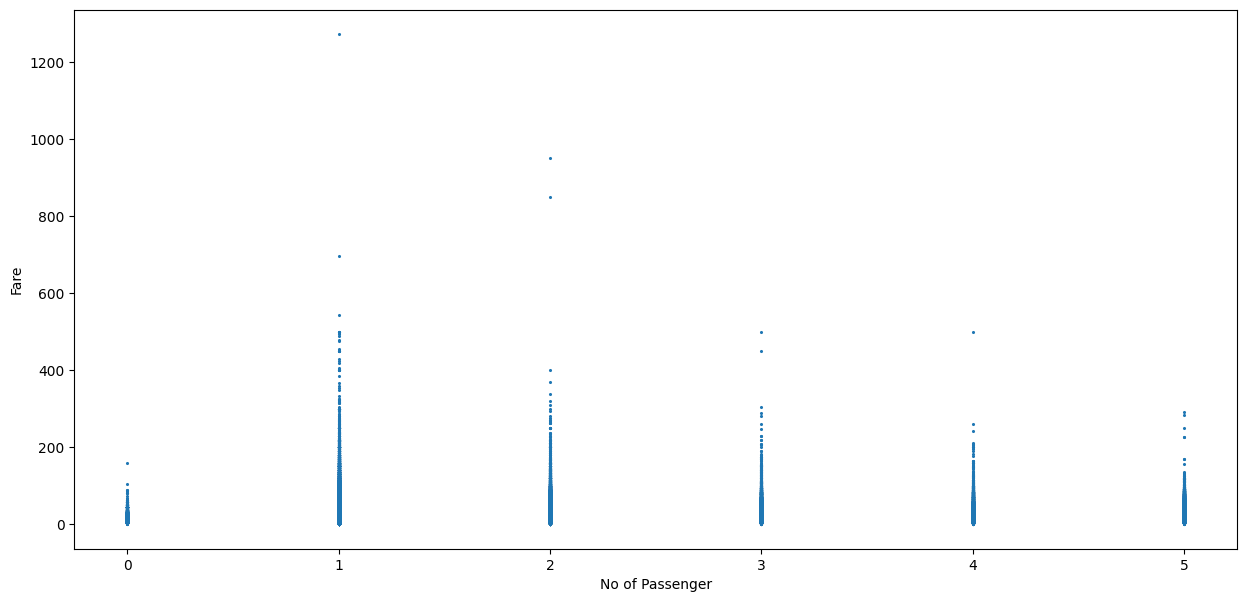

In [44]:
plt.figure(figsize=(15,7))
plt.scatter(x = train['passenger_count'],y = train['fare_amount'],s =1.5)
plt.xlabel('No of Passenger')
plt.ylabel('Fare')

In [45]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# model = smf.ols('fare_amount ~ passenger_count',train).fit()
X = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month', 'Day', 'Day of Week', 'Hour']]
X = sm.add_constant(X)  
y = train['fare_amount']


model = sm.OLS(y, X).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                 1.442e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:37:49   Log-Likelihood:            -3.6138e+07
No. Observations:             9787166   AIC:                         7.228e+07
Df Residuals:                 9787154   BIC:                         7.228e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1260.6191      3.388   -372.121      0.000   -1267.259   -1253.979
pickup_longitude      0.0244      0.003      9.238      0.000       0.019       0.030
pickup_latitude       0.0572      0.005     11.664      0.000       0.048       0.067
dropoff_longitude    -0.0201      0.003     -7.589      0.000      -0.025      -0.015
dropoff_latitude     -0.0613      0.005    -12.445      0.000      -0.071      -0.052
passenger_count       0.1234      0.003     45.858      0.000       0.118       0.129
H_Distance            0.0006   8.54e-06     70.946      0.000       0.001       0.001
Year                  0.6322      0.002    375.537      0.000       0.629       0.635
Month                 0.1088      0.001    119.553      0.000       0.107       0.111
Day                   0.0038      0.000     10.589      0.000       0.003       0.004
Day of Week           0.0036      0.002      2.262      0.024       0.000       0.007
Hour                 -0.0260      0.000    -54.372      0.000      -0.027      -0.025
==============================================================================
Omnibus:                  9963495.445   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3246692998.742
Skew:                           4.450   Prob(JB):                         0.00
Kurtosis:                      91.782   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
train.sort_values(['H_Distance','fare_amount'],ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
8494371,2011-02-12 19:07:58.000000200,14.1,2011-02-12 19:07:58+00:00,-77.835628,-74.824164,-74.001980,40.726262,1,12851.756269,2011,2,12,5,19
793922,2012-06-03 11:19:37.000000200,32.1,2012-06-03 11:19:37+00:00,-73.863359,40.769278,45.581619,-2.013462,2,12594.704725,2012,6,3,6,11
5511518,2012-07-19 18:48:00.000000221,15.7,2012-07-19 18:48:00+00:00,0.000000,0.110582,-89.963840,0.110582,2,10003.498873,2012,7,19,3,18
4177625,2012-02-13 18:57:00.000000139,8.9,2012-02-13 18:57:00+00:00,-73.945077,89.742163,0.000000,0.000000,1,9999.614439,2012,2,13,0,18
646132,2012-02-08 20:24:00.000000173,10.5,2012-02-08 20:24:00+00:00,-89.439785,1.707957,0.000000,0.000000,1,9945.278008,2012,2,8,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9439231,2015-05-13 02:48:42.000000400,0.0,2015-05-13 02:48:42+00:00,-73.965157,40.755291,-73.965157,40.755291,1,0.000000,2015,5,13,2,2
9519558,2010-02-23 06:36:38.000000300,0.0,2010-02-23 06:36:38+00:00,-73.988403,40.761640,-73.988403,40.761640,1,0.000000,2010,2,23,1,6
9561681,2015-03-19 12:14:27.000000500,0.0,2015-03-19 12:14:27+00:00,-73.937317,40.758259,-73.937317,40.758259,1,0.000000,2015,3,19,3,12
9770858,2013-08-14 10:49:00.000000167,0.0,2013-08-14 10:49:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2013,8,14,2,10


In [49]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the OLS model
# model = sm.OLS(y_train, X_train).fit()
# #
# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate R-squared value
# r2 = r2_score(y_test, y_pred)
# print("R-squared value:", r2)

# # Print summary of the model
# print(model.summary())

In [50]:
# sns.regplot(y=train.fare_amount, x=train.passenger_count, ci=None, scatter_kws={'color': 'orange', 's': 1.5})
# plt.xlim(-1, 6)
# plt.ylim(ymin=0)
# plt.show()

In [51]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins = pd.concat([bins_0, bins_1, bins_2, bins_3, bins_4, bins_5, bins_6])
# len(dist_bins)
dist_bins.columns
# dist_bins['bins']


Index(['H_Distance', 'bins'], dtype='object')

Text(0, 0.5, 'Frequency')

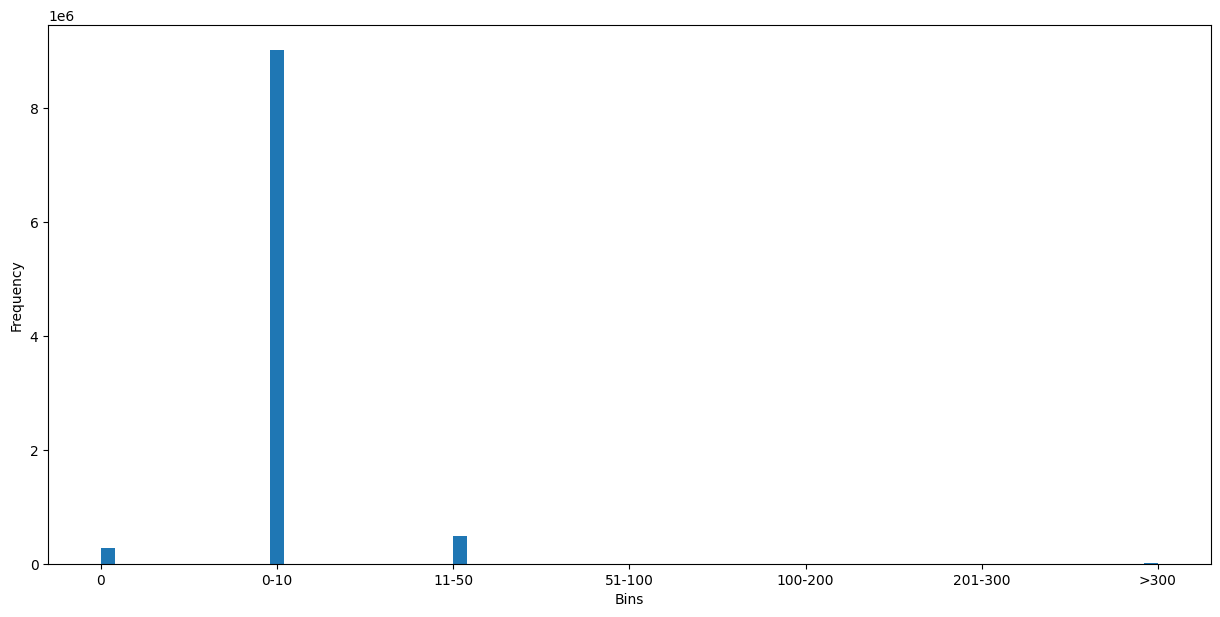

In [52]:
plt.figure(figsize=(15, 7))
plt.hist(dist_bins['bins'],bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [53]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30+00:00,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0
1833544,2015-05-01 01:49:29.000000300,0.0,2015-05-01 01:49:29+00:00,0.0,0.0,-74.001106,40.752079,1,8667.465942,2015,5,1,4,1
6954179,2015-05-21 01:01:31.000000300,0.0,2015-05-21 01:01:31+00:00,0.0,0.0,-74.044327,40.789059,1,8671.799330,2015,5,21,3,1
9377436,2015-05-14 22:07:05.000000110,0.0,2015-05-14 22:07:05+00:00,0.0,0.0,-73.975113,40.717560,1,8664.606742,2015,5,14,3,22


In [54]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [55]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour


In [56]:
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02+00:00,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37+00:00,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39+00:00,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11
1201970,2015-06-20 02:57:04.000000200,0.0,2015-06-20 02:57:04+00:00,-74.004311,40.742542,0.0,0.0,1,8667.536216,2015,6,20,5,2
1239525,2015-05-03 23:22:38.000000100,0.0,2015-05-03 23:22:38+00:00,-73.790138,40.643627,0.0,0.0,1,8647.756537,2015,5,3,6,23
1380855,2015-03-25 01:14:37.000000100,0.0,2015-03-25 01:14:37+00:00,-73.937645,40.758244,0.0,0.0,1,8662.338538,2015,3,25,2,1
1634619,2013-08-06 23:11:41.000000400,0.0,2013-08-06 23:11:41+00:00,-73.993769,40.720913,0.0,0.0,1,8666.220774,2013,8,6,1,23
1729974,2015-06-08 05:19:21.000000200,0.0,2015-06-08 05:19:21+00:00,-73.984421,40.728683,0.0,0.0,1,8665.605456,2015,6,8,0,5
2758542,2015-05-30 03:23:01.000000200,0.0,2015-05-30 03:23:01+00:00,-74.002304,40.708973,0.0,0.0,1,8666.683730,2015,5,30,5,3
3464075,2015-06-09 20:31:04.000000600,0.0,2015-06-09 20:31:04+00:00,-73.967117,40.766876,0.0,0.0,1,8664.955274,2015,6,9,1,20


In [57]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [58]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [59]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998471,2011-05-04 18:01:00.000000129,4.1,2011-05-04 18:01:00+00:00,0.000000,0.000000,-73.983752,40.743577,1,8665.854986,2011,5,4,2,18
9998562,2011-10-01 11:51:22.000000100,3.7,2011-10-01 11:51:22+00:00,0.000000,0.000000,-73.980600,40.780000,0,8666.340209,2011,10,1,5,11
9998657,2014-08-01 22:16:58.000000700,6.0,2014-08-01 22:16:58+00:00,0.000000,0.000000,-73.992972,40.735817,1,8666.459663,2014,8,1,4,22
9999127,2012-06-02 17:57:00.000000650,29.3,2012-06-02 17:57:00+00:00,-0.566667,40.726157,-73.870272,40.773335,2,5979.371303,2012,6,2,5,17


In [60]:
high_distance.shape


(19812, 14)

In [61]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

C:\Users\darsh\AppData\Local\Temp\ipykernel_16068\3428458477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_distance['H_Distance'] = high_distance.apply(


In [62]:

train.update(high_distance)

In [63]:
train[train['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,12,24,0,11
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2013,11,23,5,12
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2011,2,7,0,20
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,0.0,2009,3,25,2,0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2013,1,17,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999818,2011-08-04 23:30:00.000000140,4.9,2011-08-04 23:30:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2011,8,4,3,23
9999850,2012-01-05 19:07:00.000000229,12.1,2012-01-05 19:07:00+00:00,-74.070523,40.721715,-74.070523,40.721715,1,0.0,2012,1,5,3,19
9999859,2011-03-02 22:47:00.000000104,7.3,2011-03-02 22:47:00+00:00,-73.991500,40.726843,-73.991500,40.726843,5,0.0,2011,3,2,2,22
9999864,2012-06-15 17:36:00.000000175,8.9,2012-06-15 17:36:00+00:00,-73.783792,40.666823,-73.783792,40.666823,1,0.0,2012,6,15,4,17


In [64]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [65]:
train[(train['H_Distance']==0)].shape

(282244, 14)

In [66]:
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2015,1,21,2,6
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2015,1,21,2,14
1112195,2015-03-25 14:55:38.000000200,1.60,2015-03-25 14:55:38+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2015,3,25,2,14
1215355,2015-05-29 18:15:27.000000600,2.00,2015-05-29 18:15:27+00:00,-73.903214,40.747318,-73.903214,40.747318,1,0.0,2015,5,29,4,18
2322071,2010-02-25 12:44:00.000000125,1.25,2010-02-25 12:44:00+00:00,-73.937722,40.758318,-73.937722,40.758318,5,0.0,2010,2,25,3,12
2949904,2015-01-22 13:34:00.000000300,2.00,2015-01-22 13:34:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2015,1,22,3,13
3010346,2015-01-23 08:50:38.000000600,0.01,2015-01-23 08:50:38+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2015,1,23,4,8
4112515,2015-04-15 20:12:10.000000500,0.01,2015-04-15 20:12:10+00:00,-73.994553,40.750240,-73.994553,40.750240,1,0.0,2015,4,15,2,20
4920415,2013-08-09 18:39:00.000000201,1.50,2013-08-09 18:39:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2013,8,9,4,18
5425695,2015-02-05 17:02:10.000000700,0.01,2015-02-05 17:02:10+00:00,-73.866501,40.770050,-73.866501,40.770050,1,0.0,2015,2,5,3,17


In [67]:
train=train.drop(rush_hour.index, axis=0)

In [68]:
train.shape

(9787063, 14)

In [69]:
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2014,5,29,3,5
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1,0.0,2010,1,19,1,1
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1,0.0,2009,8,25,1,1
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2012,7,6,4,22
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2010,7,23,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984569,2009-09-30 00:42:02.000000100,2.5,2009-09-30 00:42:02+00:00,-73.982978,40.747618,-73.982978,40.747618,1,0.0,2009,9,30,2,0
9986832,2012-09-15 03:25:38.000000100,2.5,2012-09-15 03:25:38+00:00,-73.997667,40.691205,0.000000,0.000000,1,0.0,2012,9,15,5,3
9989933,2013-07-23 22:35:00.000000203,2.5,2013-07-23 22:35:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2013,7,23,1,22
9990011,2009-07-03 05:02:37.000000100,2.5,2009-07-03 05:02:37+00:00,-73.951797,40.733689,-73.951797,40.733689,1,0.0,2009,7,3,4,5


In [70]:
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,0.0,2009,2,22,6,22
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23+00:00,-73.956556,40.779828,-73.956556,40.779828,1,0.0,2013,7,21,6,0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00+00:00,-73.950282,40.701282,-73.950282,40.701282,1,0.0,2012,8,27,0,15
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48+00:00,-73.948410,40.744969,-73.948410,40.744969,1,0.0,2014,1,13,0,16
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35+00:00,-73.983934,40.754938,-73.983934,40.754938,1,0.0,2010,1,10,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988983,2012-04-30 18:53:17.000000100,2.5,2012-04-30 18:53:17+00:00,-73.993925,40.767034,-73.993925,40.767034,1,0.0,2012,4,30,0,18
9990541,2014-12-01 06:56:00.000000115,2.5,2014-12-01 06:56:00+00:00,-73.998155,40.745082,0.000000,0.000000,1,0.0,2014,12,1,0,6
9991440,2013-08-12 18:31:02.000000300,2.5,2013-08-12 18:31:02+00:00,-73.938244,40.752049,-73.938244,40.752049,1,0.0,2013,8,12,0,18
9993897,2012-08-13 19:59:53.000000100,2.9,2012-08-13 19:59:53+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,8,13,0,19


In [71]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [72]:
len(scenario_3)

185

In [73]:
scenario_3.sort_values('H_Distance', ascending=False)
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

C:\Users\darsh\AppData\Local\Temp\ipykernel_16068\3280432119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenario_3['fare_amount'] = scenario_3.apply(


In [74]:
scenario_3['fare_amount']

10002       7.468230
27891       2.501660
47302       2.528736
175352      2.514421
211455      2.509022
             ...    
9771268     2.860626
9771770     2.502176
9790321     2.538665
9914973    32.482834
9984683     2.938633
Name: fare_amount, Length: 185, dtype: float64

In [75]:
train.update(scenario_3)

In [76]:
train.shape

(9787063, 14)

In [77]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,12,24,0,11
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2013,11,23,5,12
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2011,2,7,0,20
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,0.0,2009,3,25,2,0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2013,1,17,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999818,2011-08-04 23:30:00.000000140,4.9,2011-08-04 23:30:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2011,8,4,3,23
9999850,2012-01-05 19:07:00.000000229,12.1,2012-01-05 19:07:00+00:00,-74.070523,40.721715,-74.070523,40.721715,1,0.0,2012,1,5,3,19
9999859,2011-03-02 22:47:00.000000104,7.3,2011-03-02 22:47:00+00:00,-73.991500,40.726843,-73.991500,40.726843,5,0.0,2011,3,2,2,22
9999864,2012-06-15 17:36:00.000000175,8.9,2012-06-15 17:36:00+00:00,-73.783792,40.666823,-73.783792,40.666823,1,0.0,2012,6,15,4,17


In [78]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [79]:
# Calculate the 'H_Distance' column for the DataFrame 'scenario_4_sub'
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
    # Use a lambda function to calculate the distance based on the fare_amount
    lambda row: ((row['fare_amount'] - 2.50) / 1.56),
    # Apply the lambda function along the rows (axis=1) of the DataFrame
    axis=1
)


C:\Users\darsh\AppData\Local\Temp\ipykernel_16068\1007821422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenario_4_sub['H_Distance'] = scenario_4_sub.apply(


In [80]:
train.update(scenario_4_sub)

In [81]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Day', 'Day of Week',
       'Hour'],
      dtype='object')

In [82]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Day', 'Day of Week', 'Hour'],
      dtype='object')

In [83]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [84]:
model_data = train[['Year','Hour','H_Distance','passenger_count','fare_amount']]

In [85]:
model_data.head(5)

,Year,Hour,H_Distance,passenger_count,fare_amount
0,2009,17,1.030764,1,4.5
1,2010,16,8.450134,1,16.9
2,2011,0,1.389525,2,5.7
3,2012,4,2.799270,1,7.7
4,2010,7,1.999157,1,5.3


In [86]:
x = model_data[['Year','Hour','H_Distance','passenger_count']]
y = model_data[['fare_amount']]

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [89]:
from sklearn.metrics import r2_score

y_test_pred = model_lin.predict(X_test)
score = r2_score(Y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 60.0%


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [94]:
X_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model_rf = Pipeline((
    ("standard_scaler", StandardScaler()),
    ("rf_reg", RandomForestRegressor()),
))

param_grid = {
    'rf_reg__n_estimators': [50, 100, 150],
    'rf_reg__max_depth': [None, 10, 20],
    'rf_reg__min_samples_split': [2, 5, 10],
    'rf_reg__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

score = r2_score(Y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) * 100))
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


MemoryError: Unable to allocate 44.8 MiB for an array with shape (5872238, 1) and data type float64

In [90]:
# X_test = test[features]
# filename = './output/predicted_fare'
# y_final = model.predict(X_test)
# submit = pd.DataFrame({'key': df_test.key, 'fare_amount': y_final},columns = ['key', 'fare_amount'])
# submit.to_csv('submission.csv', index = False)

In [91]:
# from lightgbm import LGBMRegressor

In [92]:
# params = {"objective" : "regression",
#           "boosting" : "gbdt", 
#           "metric" : "rmse",
#           "num_iterations" : 2000,
#           "top_k" : 30, 
#           "max_depth" : 8, 
#           "num_leaves" : 250, 
#           "min_data_in_leaf" : 20, 
#           "learning_rate" : 0.05,
#           "bagging_fraction" : 0.7, 
#           "bagging_seed" : 3,
#           "bagging_freq" : 5, 
#           "feature_fraction" : 0.5, 
#           "num_threads" : 4
#          }